1- Data Wrangle "WeRateDogs Twitter Data"

In [1]:
import pandas as pd
import numpy as np
import tweepy 
import requests
import re
import json
import matplotlib.pyplot as plt 
from timeit import default_timer as timer
from tweepy import OAuthHandler

In [2]:
!pip install jupyterthemes==0.16.1

In [3]:
!pip install tweepy


In [4]:
# Open the csv file
import pandas as pd
t_archive = pd.read_csv('twitter-archive-enhanced.csv', sep = ',')
t_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
1135,728409960103686147,NaN,NaN,2016-05-06 02:24:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. He's a skater pup. He said se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728409960...,10,10,Wallace,None,None,None,None
1462,694905863685980160,NaN,NaN,2016-02-03 15:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's a Bisquick Taj Mapaw. Too...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694905863...,10,10,Archie,None,None,None,None
1845,675845657354215424,NaN,NaN,2015-12-13 01:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pepper. She's not fully comfortable ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675845657...,10,10,Pepper,None,None,pupper,None
1535,689977555533848577,NaN,NaN,2016-01-21 01:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a pup wearing a beret. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689977555...,12,10,None,None,None,None,None


In [5]:
# Download the image prediction file using the link provided to Udacity students
import requests
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [6]:
# Showing the data in the image predictions file
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
#twitter api connection
consumer_key = 'x'
consumer_secret = 'x'
access_token = 'x'
access_secret = 'x'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [8]:

tweet_ids = t_archive.tweet_id.values
len(tweet_ids)


2356

In [9]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        print(type(line))
        tweet = json.loads(line)
        print(type(tweet))
        break
        
    
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api_df_now = pd.DataFrame(df_list)
api_df_now.head()
        
        
        

<class 'str'>
<class 'dict'>


,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [15]:

# Assessing data

df_image_predictions

t_archive

api_df_now 

# Column info of each table

t_archive.info()

df_image_predictions.info()

api_df_now .info()

# Assessing columns of twitter_archive Table

list(t_archive)

# Descriptive analysis of each table.

t_archive.describe()

api_df_now.describe()

df_image_predictions.describe()

df_image_predictions.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1560,793271401113350145,https://pbs.twimg.com/media/CwJEIKTWYAAvL-T.jpg,1,Siberian_husky,0.231695,True,Eskimo_dog,0.206749,True,Pembroke,0.070120,True
1657,810896069567610880,https://pbs.twimg.com/media/C0DhpcrUAAAnx88.jpg,1,flat-coated_retriever,0.820804,True,Labrador_retriever,0.082318,True,curly-coated_retriever,0.067461,True
557,677687604918272002,https://pbs.twimg.com/media/CWehRdEWIAAySyO.jpg,1,Pembroke,0.573047,True,sunglasses,0.126758,False,golden_retriever,0.108047,True
1802,832032802820481025,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1,whippet,0.601712,True,Ibizan_hound,0.152662,True,Italian_greyhound,0.135055,True
915,701214700881756160,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True


# Cleaning data

# Creating a copy of dataset before cleaning.


In [20]:
twitter_archive_clean=t_archive.copy()
tweet_image_pred_clean=df_image_predictions.copy()
api_data_clean=api_df_now.copy()
api_data_clean['retweet_count']


0        8853
1        6514
2        4328
3        8964
4        9774
5        3261
6        2158
7       16716
8        4429
9        7711
10       7624
11       5156
12       8538
13       4735
14       2321
15       5637
16       4709
17       4559
18       3732
19       3653
20       5609
21      12082
22      18781
23      10737
24       6167
25       8084
26       3443
27       4610
28       3316
29          4
        ...  
2324      339
2325       44
2326       92
2327      100
2328      595
2329       77
2330      146
2331       96
2332      368
2333       71
2334       82
2335       37
2336     6871
2337       16
2338       73
2339       79
2340       47
2341      174
2342       67
2343      232
2344       61
2345      146
2346      261
2347      879
2348       60
2349       41
2350      147
2351       47
2352       48
2353      532
Name: retweet_count, Length: 2354, dtype: int64

In [27]:
for i in range(len(api_data_clean)):
    if((',') in (api_data_clean.loc[i,'retweet_count'])):
        k=api_data_clean.loc[i,'retweet_count'].index(',')
        api_data_clean.loc[i,'retweet_count']=api_data_clean.loc[i,'retweet_count'][:-(len(api_data_clean.loc[i,'retweet_count'])-k)]
        
        api_data_clean['favorite_count']
        
        api_data_clean['retweet_count']=api_data_clean['retweet_count'].astype(int)
api_data_clean['favorite_count']=api_data_clean['favorite_count'].astype(int)
api_data_clean.info()

twitter_archive_clean['tweet_id']=twitter_archive_clean['tweet_id'].astype(str)

twitter_archive_clean.info()

twitter_archive_clean.name=twitter_archive_clean.name.replace('None','Unknown')

twitter_archive_clean.name.value_counts()

# Converting the columns into str type and also adding a new column 'dog_status'.

twitter_archive_clean['doggo']=twitter_archive_clean['doggo'].astype(str)
twitter_archive_clean['floofer']=twitter_archive_clean['floofer'].astype(str)
twitter_archive_clean['pupper']=twitter_archive_clean['pupper'].astype(str)
twitter_archive_clean['puppo']=twitter_archive_clean['puppo'].astype(str)
twitter_archive_clean.loc[:,'dog_status']=' '


TypeError: argument of type 'numpy.int64' is not iterable

In [30]:
# Filling values in the newly defined column as per originally filled value

for i in range(len(twitter_archive_clean)):
    if(twitter_archive_clean.loc[i,'doggo'] == 'None' and twitter_archive_clean.loc[i,'floofer'] == 'None' and twitter_archive_clean.loc[i,'pupper'] == 'None' and twitter_archive_clean.loc[i,'puppo'] == 'None'):
        twitter_archive_clean.loc[i,'dog_status']= 'None'
    elif(twitter_archive_clean.loc[i,'doggo'] == 'doggo' and twitter_archive_clean.loc[i,'floofer'] == 'None' and twitter_archive_clean.loc[i,'pupper'] == 'None' and twitter_archive_clean.loc[i,'puppo'] == 'None'):
        twitter_archive_clean.loc[i,'dog_status'] = 'Doggo'
    elif(twitter_archive_clean.loc[i,'doggo'] == 'None'and twitter_archive_clean.loc[i,'floofer'] == 'floofer' and twitter_archive_clean.loc[i,'pupper'] == 'None' and twitter_archive_clean.loc[i,'puppo'] == 'None' ):
        twitter_archive_clean.loc[i,'dog_status'] = 'Floofer'
    elif(twitter_archive_clean.loc[i,'doggo'] == 'None' and twitter_archive_clean.loc[i,'floofer'] == 'None' and twitter_archive_clean.loc[i,'pupper'] == 'pupper' and twitter_archive_clean.loc[i,'puppo'] == 'None'):
        twitter_archive_clean.loc[i,'dog_status'] = 'Pupper'
    else:
        twitter_archive_clean.loc[i,'dog_status'] = 'Puppo'
        
# Dropping the rest columns

twitter_archive_clean=twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

# Test

twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,Doggo


In [37]:


# Replacing 'None' value in dog status column with 'Unknown' as it specifies clearly that dog status is not mentioned for that particular tweet id.

twitter_archive_clean.dog_status=twitter_archive_clean.dog_status.replace('None','Unknown')

twitter_archive_clean

# Api_data table can be merged to twitter_archive table on the basis of tweet id and two more columns can be added to the twitter archive table.

# As it also contains retweets so having a separate table for retweets and favorite count is not worth it.

twitter_archive_clean=pd.merge(twitter_archive_clean,api_data_clean,on='tweet_id',how='left')
twitter_archive_clean.info()

# Removing all retweets

twitter_archive_clean=twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 24 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_status                    2175 non-null object
favorite_count_x              2175 non-null float64
retweet_count_x               2175 non-null float64
favorite_count_y              2175 non-null float64
retweet_count_y               2175 

In [42]:
# Changing the datatype of timestamp column in twitter archive table to date time format

twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_status               2175 non-null object
favorite_count_x         2175 non-null float64
retweet_count_x          2175 non-null float64
favorite_count_y         2175 non-null float64
retweet_count_y          2175 non-null float64
favorite_count_x         2175 non-null float64
retweet_count_x          2175 non-null float64
favorite_count_y         2175 non-null float64
retweet_count_y          2175 non-null float64
fav

In [45]:
# Changing the datatype of retweet count and favorite count column to integer type as count is always a whole number not a float.
# Filling the null values with count 0.
twitter_archive_clean.retweet_count=twitter_archive_clean.retweet_count.fillna(0)
twitter_archive_clean.favorite_count=twitter_archive_clean.favorite_count.fillna(0)
twitter_archive_clean['retweet_count']=twitter_archive_clean['retweet_count'].astype(int)
twitter_archive_clean['favorite_count']=twitter_archive_clean['favorite_count'].astype(int)
twitter_archive_clean.info()

# Saving the twitter_archive_clean file to csv format

twitter_archive_clean.to_csv('twitter_archive_master',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_status               2175 non-null object
favorite_count_x         2175 non-null float64
retweet_count_x          2175 non-null float64
favorite_count_y         2175 non-null float64
retweet_count_y          2175 non-null float64
favorite_count_x         2175 non-null float64
retweet_count_x          2175 non-null float64
favorite_count_y         2175 non-null float64
retweet_count_y          2175 non-null float64
fav

In [47]:
# Changing the datatype of tweet id column in tweet_image_pred table i.e. it should be of str type rather than int type.

tweet_image_pred_clean['tweet_id']=tweet_image_pred_clean['tweet_id'].astype(str)
tweet_image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


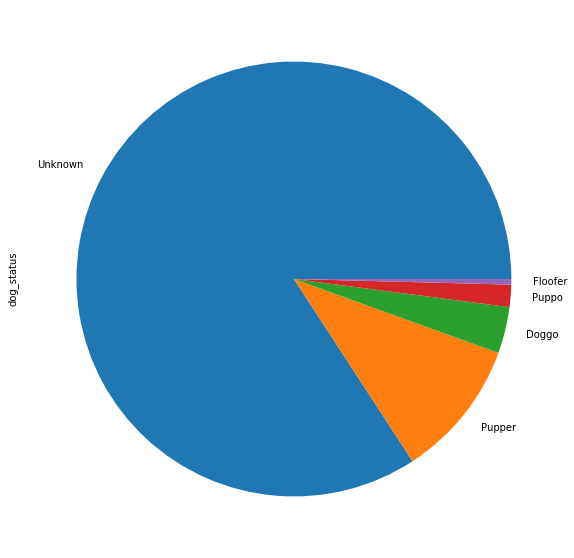

In [48]:
# Distribution of dog status depicted through pie chart

dog_status=twitter_archive_clean['dog_status'].value_counts()
dog_status.plot(kind='pie',figsize=(20,10));




0.9117316533564104

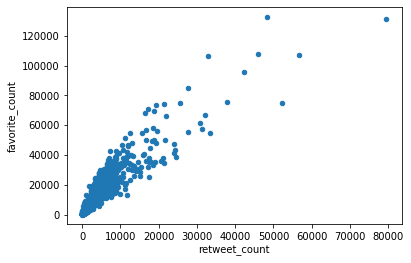

In [49]:
# Correlation between retweet count and favorite count
# depicted through scatter plot also line of best fit plotted through linear reegression.

twitter_archive_clean.plot.scatter(y='favorite_count',x='retweet_count')


# Correlaion coefficient between favorite count and retweet count.

twitter_archive_clean['retweet_count'].corr(twitter_archive_clean['favorite_count'])

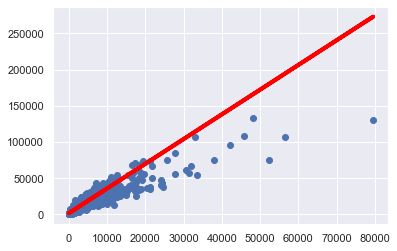

In [51]:
# Importing relevant libraries for linear regression.

import statsmodels.api as sm
import seaborn as sb

x=twitter_archive_clean['retweet_count']
y=twitter_archive_clean['favorite_count']

# Performing linear regression and depicting the summary.

x1=sm.add_constant(x)
results=sm.OLS(y,x1).fit()
results.summary()

# Plotting the regression line on the scatter plot

sb.set()
plt.scatter(x,y)
y1=3.4138*x+1658.0587
fig=plt.plot(x,y1,lw=4,c='red',label='regression line')
plt.show()


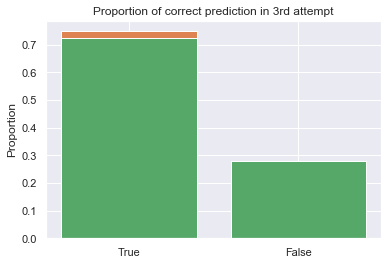

In [52]:
#Comparing the prediction proportion of all the three attempts.

# Prediction proportion of 1st attempt.

c=tweet_image_pred_clean.p1_dog.mean()
k=['True','False']
plt.bar(k,[c,(1-c)])
plt.title("Proportion of correct prediction in 1st attempt")
plt.ylabel("Proportion");

# Prediction proportion of 2nd attempt.

c=tweet_image_pred_clean.p2_dog.mean()
k=['True','False']
plt.bar(k,[c,(1-c)])
plt.title("Proportion of correct prediction in 2nd attempt")
plt.ylabel("Proportion");

# Prediction proportion of 3rd attempt.

c=tweet_image_pred_clean.p3_dog.mean()
k=['True','False']
plt.bar(k,[c,(1-c)])
plt.title("Proportion of correct prediction in 3rd attempt")
plt.ylabel("Proportion");

# From the above three bar graphs it is clear that each prediction attempt is independent of each other as the proportion of correct prediction is almost same.

# Conclusion

# From the pie hart it is clear that majority of the tweets does not contain the dog status information and among those who contain the information 'Pupper' forms the major proportion.

# The correlation coefficient obtained between the two quantities show that there is a positive correlation between them.

# The regression line aligns with data points in a particular direction and treats the points above it as outliers, thereby depicting that the correlation is not strongly positive i.e. there may be more underlying factors which need to be taken in account.

# From the three bar graphs of prediction proportion it is clear that each prediction attempt is independent of each other as the proportion of correct prediction does not vary much.

